# Ensemble Methods

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Set theme for plotting
sns.set_theme()

# Import the data
data, target = datasets.load_wine(return_X_y=True, as_frame=True)

## Bagging

### Visualization of dataset

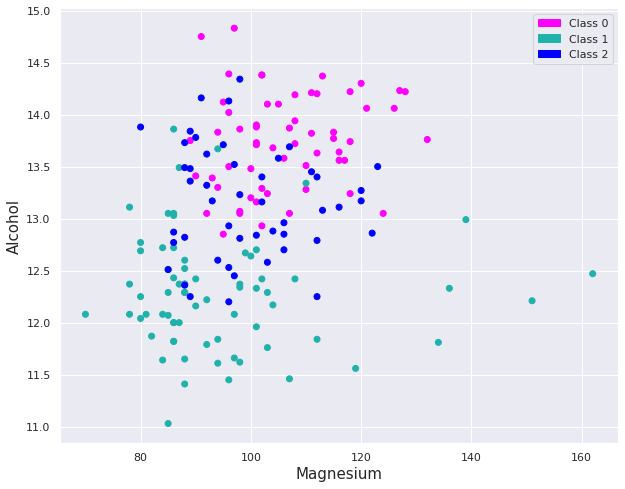

In [48]:
X = data[["magnesium", "alcohol"]].to_numpy() 
colors = ["magenta"if label == 0 else "lightseagreen" if label == 1 else "blue" for label in target]

y = target.to_numpy()

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c = colors)
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("Alcohol", fontsize = 15)

#Plot legend
import matplotlib.patches as mpatches
Class_0 = mpatches.Patch(color='magenta', label='Class 0')
Class_1 = mpatches.Patch(color='lightseagreen', label='Class 1')
Class_2 = mpatches.Patch(color='blue', label='Class 2')
plt.legend(handles=[Class_0, Class_1, Class_2])
plt.grid(True)
plt.show()

### Train the dataset with Bagging Classifier

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

Then we want to import the bagging classifier to train the dataset and compare it with decision tree.


### Error Analysis

In [51]:
from sklearn.metrics import classification_report

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")


Stump Classification Report
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        26
           1       0.85      0.85      0.85        27
           2       0.00      0.00      0.00        19

    accuracy                           0.68        72
   macro avg       0.48      0.62      0.53        72
weighted avg       0.53      0.68      0.58        72
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.67      0.23      0.34        26
           1       0.92      0.81      0.86        27
           2       0.36      0.74      0.48        19

    accuracy                           0.58        72
   macro avg       0.65      0.59      0.56        72
weighted avg       0.68      0.58      0.57        72
 



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging Classification Report
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        26
           1       0.85      0.85      0.85        27
           2       0.00      0.00      0.00        19

    accuracy                           0.68        72
   macro avg       0.48      0.62      0.53        72
weighted avg       0.53      0.68      0.58        72
 



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging Classification has a higher accuracy and precision compared to tree classification. Next, we want to visualize the tree classification and bagging classification.

### Visualization of Bagging Classifier

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


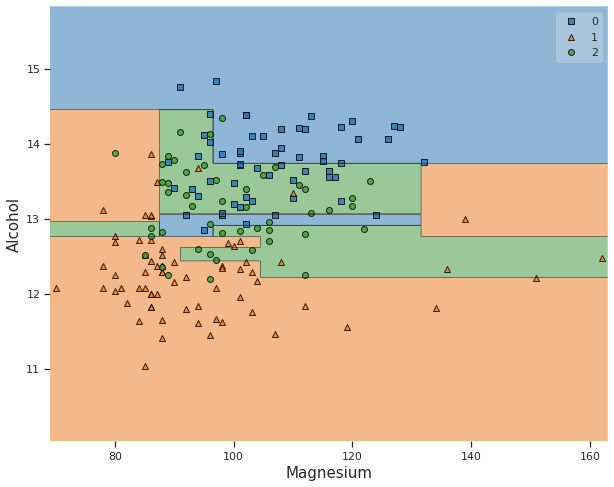

In [54]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("Alcohol", fontsize = 15)
plt.grid()
plt.show()

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


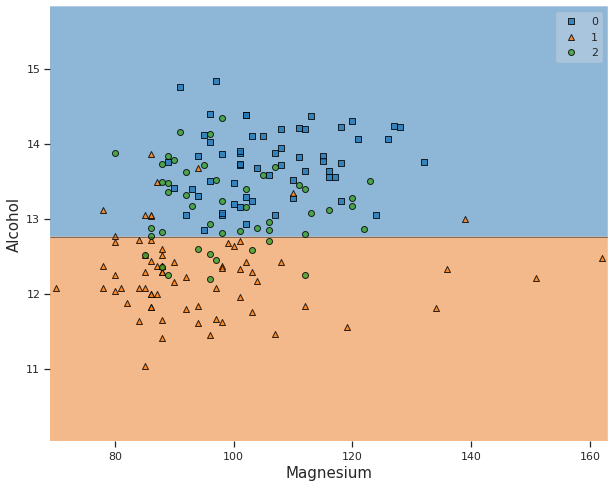

In [57]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("Alcohol", fontsize = 15)
plt.grid()
plt.show()

Only from the plot we see that the bagging classifier doesn't perform as well as the decision tree. Now we want to adding max_depth.

In [59]:
bag_clf1 = BaggingClassifier(DecisionTreeClassifier(max_depth=3, random_state=42), 
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf1.fit(X_train, y_train)
bag_y_pred1 = bag_clf1.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred1), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        26
           1       0.83      0.93      0.88        27
           2       0.50      0.47      0.49        19

    accuracy                           0.72        72
   macro avg       0.69      0.70      0.69        72
weighted avg       0.72      0.72      0.72        72
 



/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


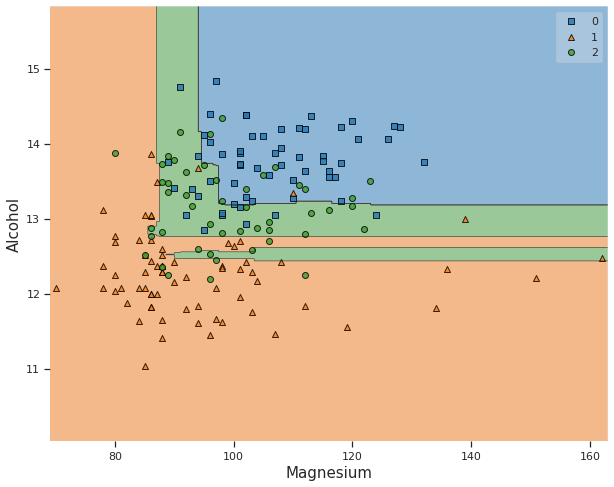

In [61]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf1)
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("Alcohol", fontsize = 15)
plt.grid()
plt.show()

The bagging classifier performs much better and have a higher accuracy as well.

## Random Forests

In [66]:
from sklearn.ensemble import RandomForestClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        26
           1       0.85      0.85      0.85        27
           2       0.00      0.00      0.00        19

    accuracy                           0.68        72
   macro avg       0.48      0.62      0.53        72
weighted avg       0.53      0.68      0.58        72
 



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Forest Classification Report
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        26
           1       0.76      0.96      0.85        27
           2       0.00      0.00      0.00        19

    accuracy                           0.72        72
   macro avg       0.48      0.65      0.55        72
weighted avg       0.53      0.72      0.61        72
 



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As observed in the output of the above code cell, the accuracy of the bagging classifier with decision stumps is lower than the random forest, which proves the theory that the random forest model will have less variance than the random forest. Next, we want to compare them by plotting.

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


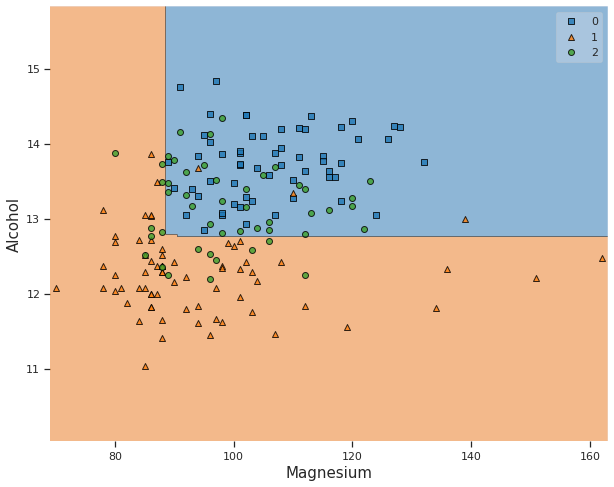

In [67]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("Alcohol", fontsize = 15)
plt.grid()
plt.show()

Random forest performed better than bagging classifier by splitting with two areas instead of splitting with one straight line. Next we want to increase the ```max_depth``` to see how much it improves.

In [69]:
forest_clf1 = RandomForestClassifier(max_depth = 3, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf1.fit(X_train, y_train)
forest_y_pred1 = forest_clf1.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        26
           1       0.76      0.96      0.85        27
           2       0.00      0.00      0.00        19

    accuracy                           0.72        72
   macro avg       0.48      0.65      0.55        72
weighted avg       0.53      0.72      0.61        72
 



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy and precision is the same as the original random forest. Then we want to plot it to see whether there are any differences.

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


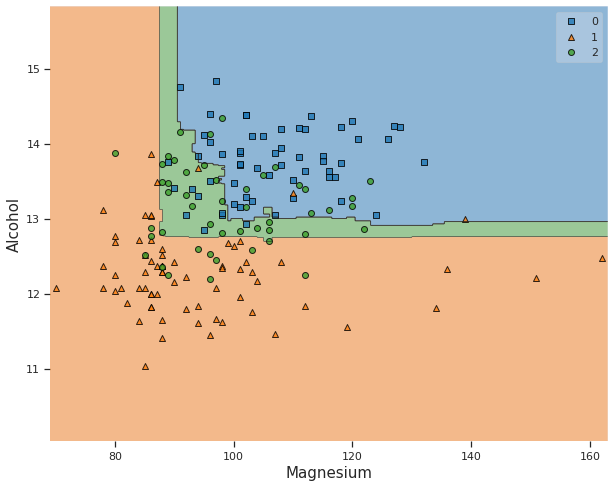

In [70]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf1)
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("Alcohol", fontsize = 15)
plt.grid()
plt.show()

It improves much better, and it is similar to bagging classifier with max_depth of 3.